# <u ><b><center style="color:blue" align =" center ">Doctor Descry</center></b></u> 

##  *Team Leader Name: Suraj Gorai (surajgorai2002@gmail.com)* 
## *Member Name: Pranjal Paira* (pranjal.lumia@gmail.com)
## *Member Name: Anurag Vaibhav* (anuragvaibhav7@gmail.com)
## Contact Numer: 8083870763, 7004210543,9031938393

<img src="download.gif" width="750" align="center">

### <u>Importing Libraries</u>

In [1]:
#Importing libraries , Here we have used pandas for Reading the Csv, data cleaning ,data manipulation.
#Numpy and Matplotlib for various mathematical uses , lastly sklearn for Kmeans and min_max scaler.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### <u> Cleaning Data</u>

In [2]:
#Here ,we are checking for any missing values.
missing_value=["N/a","na",np.nan]
df=pd.read_csv("data.csv",na_values=missing_value)
df=df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().sum()

Name                       0
Specialisation            37
City                      15
Hospital/Clinic          494
Experience                25
Padma_Vibhushan            0
Padma_Bhushan              0
Padma_Shri                 0
Dhanvantari_Award          0
BC_Roy_National_Award      0
Other_Awards               0
dtype: int64

In [3]:
#Dropping the entries having missing values as it cannot be replaced i.e,- Specialisation ,City ,Hospital/Clinic ,Experience     
df=df.dropna()

### <u>Printing Data After Cleaning</u>

In [4]:
df.head()

,Name,Specialisation,City,Hospital/Clinic,Experience,Padma_Vibhushan,Padma_Bhushan,Padma_Shri,Dhanvantari_Award,BC_Roy_National_Award,Other_Awards
0,Prof. Dr. Suresh H. Advani,Medical Oncologist,Mumbai,"Jaslok Hospital, Mumbai",43.0,0,1,1,1,1,8
1,Dr. Ashok Seth,Interventional Cardiologist,New Delhi,"Fortis Escorts Heart Institute, New Delhi",38.0,0,1,1,0,0,8
4,Prof. Dr. Mohamed Rela,Liver Transplant Surgeon,Chennai,"Dr. Rela Institute and Medical Centre, Chennai",31.0,0,0,0,0,0,9
6,Dr. R.C.M Kaza,Urologist and Andrologist,New Delhi,"Max Super Speciality hospital, Patparganj, Ne...",36.0,0,0,0,0,0,9
7,Dr Harit Chaturvedi,Surgical Oncologist,New Delhi,"Max Super Speciality Hospital, Saket, New Delhi",25.0,0,0,0,0,0,7


In [5]:
#Here, we have used minmaxscaler to normalise the data of coumn Experience and Awards
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df[['Experience']])
df[['Experience']]=scaled
df['Awards']=60*df['Padma_Vibhushan']+50*df['Padma_Bhushan']+40*df['Padma_Shri']+30*df['Dhanvantari_Award']+20*df['BC_Roy_National_Award']+10*df['Other_Awards']
scaled2=scaler.fit_transform(df[['Awards']])
df[['Awards']]=scaled2
df.drop('Padma_Vibhushan',
  axis='columns', inplace=True)
df.drop('Padma_Bhushan',
  axis='columns', inplace=True)
df.drop('Padma_Shri',
  axis='columns', inplace=True)
df.drop('Dhanvantari_Award',
  axis='columns', inplace=True)
df.drop('BC_Roy_National_Award',
  axis='columns', inplace=True) 
df.drop('Other_Awards',
  axis='columns', inplace=True)
df

,Name,Specialisation,City,Hospital/Clinic,Experience,Awards
0,Prof. Dr. Suresh H. Advani,Medical Oncologist,Mumbai,"Jaslok Hospital, Mumbai",0.767857,1.000000
1,Dr. Ashok Seth,Interventional Cardiologist,New Delhi,"Fortis Escorts Heart Institute, New Delhi",0.678571,0.761905
4,Prof. Dr. Mohamed Rela,Liver Transplant Surgeon,Chennai,"Dr. Rela Institute and Medical Centre, Chennai",0.553571,0.380952
6,Dr. R.C.M Kaza,Urologist and Andrologist,New Delhi,"Max Super Speciality hospital, Patparganj, Ne...",0.642857,0.380952
7,Dr Harit Chaturvedi,Surgical Oncologist,New Delhi,"Max Super Speciality Hospital, Saket, New Delhi",0.446429,0.285714
...,...,...,...,...,...,...
5520,Dr. Poonam Goyal,Radiation Oncologist,Jaipur,"Manipal Hospital, Jaipur",0.250000,0.428571
5521,Dr. Ashwini B Gowdra,Gynaecologist and Obstetrician,Koramangala,"Apollo Cradle & Children's Hospital, Koramangala",0.285714,0.238095
5522,Dr. Ayesha Sharieff,Gynaecologist and Obstetrician,Koramangala,"Apollo Cradle & Children's Hospital, Koramangala",0.285714,0.285714
5523,Dr. Deepesh Agarwal,Interventional Cardiologist,Jaipur,"Mahatma Gandhi Medical College & Hospital, Ja...",0.285714,0.380952


## <u>Plotting Experience vs Awards after Normalising</u>

In [1]:
#The scatter plot between Expereinece vs Awards helps in visualization of data
plt.scatter(df['Experience'],df['Awards'])

NameError: name 'plt' is not defined

##   <u>Calculating SSE to measure how well the data set is Clustered.</u>

In [7]:
#Here we have calculated the sum of squared error and measured how well it is clustered.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Experience','Awards']])
    sse.append(km.inertia_)

## <u> Plot between sum of squared error vs value of KMeans(Elbow Method) </u>

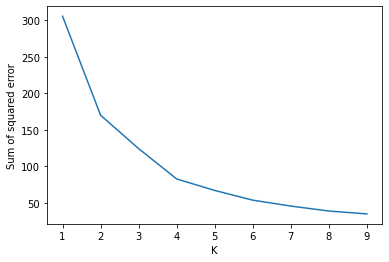

In [8]:
#Here, We hvae plotted a graph between SSE and KMeans to select the optimal number of clusters.
#This method is called Elbow method and the point obtained is elbow point(n=4).
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## <u> Kmeans , Cluster and Labelling </u>

In [ ]:
#We have divided the data in 4 clusters.
km=KMeans(n_clusters=4)
km

In [ ]:
#Labelling to the dataset
y_predict=km.fit_predict(df[['Awards','Experience']])

In [ ]:
df['cluster']=y_predict
df

### <u>Enter the Name of the Doctor , Specialisation , City ,Experience , Award Points of the Doctor </u>

In [ ]:
Doctor_Name=input("Enter the Name of the Doctor: ")
specialisaton=input("Enter the Specialisation of the Doctor: ")
city=input("Enter the City of the Doctor: ")
doctor_Experience=int(input("Enter the Experience of the Doctor: "))
doctor_Awards_Points=int(input("Enter the Award Points of the Doctor: "))

### <u>Normalizing the Data</u>

In [ ]:
#Here we are normalising the data given by the user
Experience_Normalised=doctor_Experience/70
Awards_Point_Normalised=doctor_Awards_Points/100

## <u> Actual Prediction </u>

In [ ]:
predicted_user=km.predict([[Experience_Normalised,Awards_Point_Normalised]])
predicted_user

## <u>Finding better Doctor according to the experience and awards</u>

In [ ]:
#Using loop we have iterated the data set and used a condition to return the better doctor to the final list.
final=[]
if(predicted_user <4): #for outliers
    for i in range((df.shape[0])):
        if(str (df.iloc[i,2]).count(city)>0 and str (df.iloc[i,1]).count(specialisaton)>0 and df.iloc[i,6]==predicted_user and Experience_Normalised< float(df.iloc[i,4]) and Awards_Point_Normalised < float(df.iloc[i,5])):
            final.append(df.iloc[i])
else :
    print("Sorry! We cannot match these in data set")

## <u>Doctor list</u>

In [ ]:
#The final Data.
if(len(final)):
    print(final)
else:
    print("Your Doctor is the best in your Area.")

# <u> END </u>